# Chat Analysis
## 🔥Tobia x Shuyan🔥
### Between 13.05.2023 - 19-06-2023

---------------------- Dear 淑妍 ---------------------- <br>
Hey Shuyan! I hope you doing great darling ♥️<br>
You know I love data and my work is data.<br>
So I decided to use my skills to analyze our chat.<br>
I hope you find it interesting. I had much fun doing that!<br>
--------------------------------------------------------<br>
<br>


Features:
- Since when
- Average messages per day
    - All
    - Text
    - Picture
    - Video
    - Audio
- Verlauf der Anzahl pro Tag (Line-Plot)
    - All
    - Text
    - Picture
    - Video
    - Audio
- Most used words, emojis, Stickers
- How many messages
    - Complete
    - From me
    - From her
- Streak -> Longest conversation without a day without writting
- Wordcloud from our chat

---

### preparation

In [177]:
# imports
import os

import json
from datetime import datetime, timedelta
from copy import deepcopy

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np

import jieba    # for chinese wordcloud
import string

import pdfkit

In [178]:
# variables

text_complete = ""    # for wordcloud

amount_text_msg = 0
text_msg_per_day = dict()   # "11.05.2023: 0"
text_msg_per_day_from_me = dict()
text_msg_per_day_from_her = dict()

words = dict()
amount_words = 0
words_per_day = dict()
words_per_day_from_me = dict()
words_per_day_from_her = dict()

pictures = dict()
amount_picture_msg = 0
pictures_per_day = dict()
pictures_per_day_from_me = dict()
pictures_per_day_from_her = dict()

sticker = dict()
amount_sticker_msg = 0
sticker_per_day = dict()
sticker_per_day_from_me = dict()
sticker_per_day_from_her = dict()

animations = dict()
amount_animations_msg = 0
animations_per_day = dict()
animations_per_day_from_me = dict()
animations_per_day_from_her = dict()

video = dict()
amount_video_msg = 0
video_per_day = dict()
video_per_day_from_me = dict()
video_per_day_from_her = dict()

audio = dict()
amount_audio_msg = 0
audio_per_day = dict()
audio_per_day_from_me = dict()
audio_per_day_from_her = dict()

emoji = dict()
amount_emojis = 0
emoji_per_day = dict()
emoji_per_day_from_me = dict()
emoji_per_day_from_her = dict()

amount_msg = 0
amount_msg_from_me = 0
amount_msg_from_her = 0
amount_msg_per_day = dict()
amount_msg_from_me_per_day = dict()
amount_msg_from_her_per_day = dict()

longest_streak_in_days = None
longest_streak_first_date = None
longest_streak_last_date = None
first_streak_day = None
last_streak_day = None
cur_streak = None

# constants
MY_NAME = "Tobia Ippolito"
MY_ID = "user6101173526"
HER_NAME = "Liu Shuyan 😊😍☺️😇🌕🌹💐"
HER_ID = "user6118080449"
FROM_DATE = "2023-05-13"
DATE = "2023-07-09"
GROUND_PATH = "D:/BACKUP/Liu Shuyan"

# get newest date
dates = []
most_current_day = convert_date_in_unixtime("2023-05-13", american_format=True)
for elem in os.listdir(GROUND_PATH):
    splitted_elem = elem.split("-")
    if len(splitted_elem) == 3:
        year = int(splitted_elem[0].split("_")[-1])
        month = int(splitted_elem[1])
        if len(splitted_elem[2]) > 2:
            day = int(splitted_elem[2].split(" ")[0])
        else:
            day = int(splitted_elem[2])
        cur_date = convert_date_in_unixtime(f"{day}.{month}.{year}")
        if most_current_day < cur_date:
            most_current_day = cur_date
DATE = convert_unixtime_in_date(most_current_day, american_format=True)

PATH = f"{GROUND_PATH}/ChatExport_{DATE} (JSON)"
if os.path.exists(PATH) == False:
    PATH = f"D:/BACKUP/Liu Shuyan/ChatExport_{DATE}"
    if os.path.exists(PATH) == False:
        raise Exception("Chat not found!")

In [179]:
#laden von Slowly Daten => von FROM_DATE!


In [180]:
EMOJIS = [
    "😀", "😃", "😄", "😁", "😆", "😅", "😂", "🤣", "😊", "😇", "🙂", "🙃", "😉", "😌", "😍",
    "🥰", "😘", "😗", "😙", "😚", "😋", "😛", "😝", "😜", "🤪", "🤨", "🧐", "🤓", "😎", "🤩", "🥳",
    "😏", "😒", "😞", "😔", "😟", "😕", "🙁", "☹️", "😣", "😖", "😫", "😩", "🥺", "😢", "😭", "😤",
    "😠", "😡", "🤬", "🤯", "😳", "🥵", "🥶", "😱", "😨", "😰", "😥", "😓", "🤗", "🤔", "🤭", "🤫",
    "🤥", "😶", "😐", "😑", "😬", "🙄", "😯", "😦", "😧", "😮", "😲", "🥱", "😴", "🤤", "😪", "😵",
    "🤐", "🥴", "🤢", "🤮", "🤧", "😷", "🤒", "🤕", "🤑", "🤠", "😈", "👿", "👹", "👺", "🤡", "💩",
    "👻", "💀", "☠️", "👽", "👾", "🤖", "🎃", "😺", "😸", "😹", "😻", "😼", "😽", "🙀", "😿", "😾",
    "🙈", "🙉", "🙊", "💋", "💌", "💘", "💝", "💖", "💗", "💓", "💞", "💕", "💟", "❣️", "💔", "❤️",
    "🧡", "💛", "💚", "💙", "💜", "🤎", "🖤", "🤍", "💯", "💢", "💥", "🔥", "🕳️", "💤", "🗨️", "👋",
    "✋", "🤚", "🖐️", "✋", "👌", "🤏", "✌️", "🤞", "🤟", "🤘", "🤙", "👈", "👉", "👆", "🖕", "👇",
    "☝️", "👍", "👎", "✊", "👊", "🤛", "🤜", "👏", "🙌", "👐", "🤲", "🙏", "✍️", "💅", "🤳", "💪",
    "🦵", "🦶", "👂", "🦻", "👃", "👶", "🧒", "👦", "👧", "🧑", "👱", "👨", "🧔", "👨‍🦰", "👨‍🦱", "👨‍🦳",
    "👨‍🦲", "👩", "👩‍🦰", "👩‍🦱", "👩‍🦳", "👩‍🦲", "🧑‍🦰", "🧑‍🦱", "🧑‍🦳", "🧑‍🦲", "👱‍♀️", "👱‍♂️", "🧓", "👴", "👵",
    "🙍", "🙍‍♂️", "🙍‍♀️", "🙎", "🙎‍♂️", "🙎‍♀️", "🙅", "🙅‍♂️", "🙅‍♀️", "🙆", "🙆‍♂️", "🙆‍♀️", "💁", "💁‍♂️", "💁‍♀️", "🙋",
    "🙋‍♂️", "🙋‍♀️", "🧏", "🧏‍♂️", "🧏‍♀️", "🙇", "🙇‍♂️", "🙇‍♀️", "🤦", "🤦‍♂️", "🤦‍♀️", "🤷", "🤷‍♂️", "🤷‍♀️", "👨‍⚕️", "👩‍⚕️",
    "👨‍🎓", "👩‍🎓", "👨‍🏫", "👩‍🏫", "👨‍⚖️", "👩‍⚖️", "👨‍🌾", "👩‍🌾", "👨‍🍳", "👩‍🍳", "👨‍🔧", "👩‍🔧", "👨‍🏭", "👩‍🏭", "👨‍💼", "👩‍💼", "👨‍🔬",
    "👩‍🔬", "👨‍💻", "👩‍💻", "👨‍🎤", "👩‍🎤", "👨‍🎨", "👩‍🎨", "👨‍✈️", "👩‍✈️", "👨‍🚀", "👩‍🚀", "👨‍🚒", "👩‍🚒", "👮", "👮‍♂️", "👮‍♀️", "🕵️", "🕵️‍♂️",
    "🕵️‍♀️", "💂", "💂‍♂️", "💂‍♀️", "👷", "👷‍♂️", "👷‍♀️", "🤴", "👸", "👳", "👳‍♂️", "👳‍♀️", "👲", "🧕", "🤵", "👰",
    "🤰", "🤱", "👼", "🎅", "🤶", "🦸", "🦸‍♂️", "🦸‍♀️", "🦹", "🦹‍♂️", "🦹‍♀️", "🧙", "🧙‍♂️", "🧙‍♀️", "🧚", "🧚‍♂️", "🧚‍♀️",
    "🧛", "🧛‍♂️", "🧛‍♀️", "🧜", "🧜‍♂️", "🧜‍♀️", "🧝", "🧝‍♂️", "🧝‍♀️", "🧞", "🧞‍♂️", "🧞‍♀️", "🧟", "🧟‍♂️", "🧟‍♀️", "💆", "💆‍♂️",
    "💆‍♀️", "💇", "💇‍♂️", "💇‍♀️", "🚶", "🚶‍♂️", "🚶‍♀️", "🧍", "🧍‍♂️", "🧍‍♀️", "🧎", "🧎‍♂️", "🧎‍♀️", "🧑‍🦯", "👨‍🦯", "👩‍🦯", "🧑‍🦼",
    "👨‍🦼", "👩‍🦼", "🧑‍🦽", "👨‍🦽", "👩‍🦽", "🏃", "🏃‍♂️", "🏃‍♀️", "💃", "🕺", "🕴️", "👯", "👯‍♂️", "👯‍♀️", "🧖", "🧖‍♂️", "🧖‍♀️",
    "🧘", "🧑‍🤝‍🧑", "👭", "👫", "👬", "💏", "👨‍❤️‍💋‍👨", "👩‍❤️‍💋‍👩", "💑", "👨‍❤️‍👨", "👩‍❤️‍👩", "👪", "👨‍👩‍👦", "👨‍👩‍👧", "👨‍👩‍👧‍👦", "👨‍👩‍👦‍👦", "👨‍👩‍👧‍👧", "👨‍👨‍👦", "👨‍👨‍👧", "👨‍👨‍👧‍👦", "👨‍👨‍👦‍👦", "👨‍👨‍👧‍👧", "👩‍👩‍👦", "👩‍👩‍👧", "👩‍👩‍👧‍👦", "👩‍👩‍👦‍👦", "👩‍👩‍👧‍👧", "👨‍👦", "👨‍👦‍👦", "👨‍👧",
    "👨‍👧‍👦", "👨‍👧‍👧", "👩‍👦", "👩‍👦‍👦", "👩‍👧", "👩‍👧‍👦", "👩‍👧‍👧", "🗣️", "👤", "👥"
]

In [181]:
# helper functions
def convert_unixtime_in_date(unixtime:int, american_format=False):
    if type(unixtime) != int:
        unixtime = int(unixtime)

    dt = datetime.fromtimestamp(unixtime)
    if american_format:
        res = f"{dt.year}-{dt.month:02d}-{dt.day:02d}"
    else:
        res = f"{dt.day:02d}.{dt.month:02d}.{dt.year}"
    return res

def convert_date_in_unixtime(date:str, american_format=False):
    if american_format:
        date_format = "%Y-%m-%d"
    else:
        date_format = "%d.%m.%Y"

    dt = datetime.strptime(date, date_format)
    return int(dt.timestamp())

print(convert_unixtime_in_date(1683928800))
print(convert_unixtime_in_date(1683928800, american_format=True))
print(convert_date_in_unixtime('13.05.2023'))
print(convert_date_in_unixtime('2023-05-13', american_format=True))

def get_date_between(first_date:str, second_date:str, american_format=False) -> list:
    if american_format:
        date_format = "%Y-%m-%d"
    else:
        date_format = "%d.%m.%Y"

    dt_1 = datetime.strptime(first_date, date_format)
    dt_2 = datetime.strptime(second_date, date_format)

    res = []
    for cur_day in range((dt_2-dt_1).days + 1):
        cur_dt = dt_1 + timedelta(days=cur_day)
        if american_format:
            cur_res = f"{cur_dt.year}-{cur_dt.month:02d}-{cur_dt.day:02d}"
        else:
            cur_res = f"{cur_dt.day:02d}.{cur_dt.month:02d}.{cur_dt.year}"
        res += [cur_res]
    return res

def get_days_between(first_date:str, second_date:str, american_format=False):
    dates = get_date_between(first_date, second_date, american_format)
    return max(0, len(dates)-1)

print(get_date_between("13.05.2023", "13.06.2023"))
print(get_date_between("2023-05-13", "2023-06-13", american_format=True))
print(get_days_between("13.05.2023", "13.06.2023"))
print(get_days_between("13.05.2023", "13.05.2023"))
print(get_days_between("13.05.2023", "12.05.2023"))
print(get_days_between("13.05.2023", "14.05.2023"))

def increase_dict_counter(target_dict:dict, key:str, amount=1) -> dict:
    cur_dict = deepcopy(target_dict)
    if key in cur_dict.keys():
        cur_dict[key] += amount
    else:
        cur_dict[key] = amount

    return cur_dict

test_dict = {"hallo":50}
test_dict_2 = increase_dict_counter(test_dict, "hallo")
test_dict_2 = increase_dict_counter(test_dict_2, "moin")
print(test_dict)
print(test_dict_2)

def get_emojis_in_str(text:str) -> dict:
    founded_emojis = dict()
    for char in text:
        if char in EMOJIS:
            founded_emojis = increase_dict_counter(founded_emojis, char)
    return founded_emojis

print(get_emojis_in_str("Test Sentence 1"))
print(get_emojis_in_str(""))
print(get_emojis_in_str("Test Sentence 1 😇"))
print(get_emojis_in_str("❤️"))
print(get_emojis_in_str("Test Sentence 1 😇. And another one 😇🥰❤️"))

def get_words_in_str(text:str) -> tuple:
    to_remove = [".", ",", "!", "?"] + EMOJIS
    for rm_elem in to_remove:
        text = text.replace(rm_elem, "")
    words = text.split(" ")

    words_dict = dict()
    for cur_word in words:
        if len(cur_word) > 0:
            words_dict = increase_dict_counter(words_dict, cur_word)
    return words_dict

print(get_words_in_str("Hey, wie geht es dir?🥰"))

def merge_dicts(dict_1, dict_2):
    dict_1 = deepcopy(dict_1)
    dict_2 = deepcopy(dict_2)

    for key, value in dict_2.items():
        if key in dict_1.keys():
            dict_1[key] += value
        else:
            dict_1[key] = value
    return dict_1

print(merge_dicts({"a":3, "b":4}, {"b":3, "c":24}))

13.05.2023
2023-05-13
1683928800
1683928800
['13.05.2023', '14.05.2023', '15.05.2023', '16.05.2023', '17.05.2023', '18.05.2023', '19.05.2023', '20.05.2023', '21.05.2023', '22.05.2023', '23.05.2023', '24.05.2023', '25.05.2023', '26.05.2023', '27.05.2023', '28.05.2023', '29.05.2023', '30.05.2023', '31.05.2023', '01.06.2023', '02.06.2023', '03.06.2023', '04.06.2023', '05.06.2023', '06.06.2023', '07.06.2023', '08.06.2023', '09.06.2023', '10.06.2023', '11.06.2023', '12.06.2023', '13.06.2023']
['2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12', '2023-06-13']
31
0
0
1
{'hallo': 50}
{'hallo': 51, 'moin': 1}
{}
{}
{'😇'

In [182]:
FROM_DATE_NOT_AMERICAN = convert_unixtime_in_date(convert_date_in_unixtime(FROM_DATE, american_format=True))
DATE_NOT_AMERICAN = convert_unixtime_in_date(convert_date_in_unixtime(DATE, american_format=True))
DATE_NOT_AMERICAN

'09.07.2023'

In [183]:
def create_copy(*iter):
    result = []
    for elem in iter:
        result += [deepcopy(elem)]
    return result

def collect_stats(message, cur_date, media_name_dict, amount_media_msg, media_per_day, media_per_day_from_me, media_per_day_from_her):
    message, cur_date, media_name_dict, amount_media_msg, media_per_day, media_per_day_from_me, media_per_day_from_her = create_copy(message, cur_date, media_name_dict, amount_media_msg, media_per_day, media_per_day_from_me, media_per_day_from_her)
    
    media_name_dict = increase_dict_counter(media_name_dict, message["file"])
    amount_media_msg += 1
    media_per_day = increase_dict_counter(media_per_day, cur_date)
    if is_message_from_me:
        media_per_day_from_me = increase_dict_counter(media_per_day_from_me, cur_date)
    else:
        media_per_day_from_her = increase_dict_counter(media_per_day_from_her, cur_date)

    return (media_name_dict, amount_media_msg, media_per_day, 
            media_per_day_from_me, media_per_day_from_her)

In [184]:
def calc_mean(input_dict:dict):
    value = 0
    amount = 0
    for cur_value in input_dict.values():
        amount += 1
        value += cur_value
    if amount == 0:
        return value
    return value/amount

def get_elem_with_top_amount(input_dict:dict, amount=5, sort_key=lambda x:-x[1], reserve=False):
    elems = list(input_dict.items())
    elems = sorted(elems, key=sort_key, reverse=reserve)
    return elems[:amount]

print(get_elem_with_top_amount({"a":3, "b":10, "c":4, "d":2}, amount=2))
print(get_elem_with_top_amount({"a":3, "b":10, "c":4, "d":2}, sort_key=lambda x:x[1]))

[('b', 10), ('c', 4)]
[('d', 2), ('a', 3), ('c', 4), ('b', 10)]


In [185]:
def convert_dict_as_date_sorted_list(input_dict:dict, american_format=False, reverse=False) -> tuple:
    cur_dict = list(input_dict.items())
    cur_dict = sorted(cur_dict, key=lambda x:convert_date_in_unixtime(x[0], american_format=american_format), reverse=reverse)
    return list(zip(*cur_dict))

print(convert_dict_as_date_sorted_list({"19.02.2023":2, "19.02.2022":5, "19.05.2022":10}))

[('19.02.2022', '19.05.2022', '19.02.2023'), (5, 10, 2)]


In [186]:
def replace_elems_in_str(input_str:str, elems:list, replace_elem=""):
    new_str = input_str
    for elem_to_replace in elems:
        new_str = new_str.replace(elem_to_replace, replace_elem)
    return new_str

---

### load chat

In [187]:
with open(f"{PATH}/result.json", "r", encoding="utf8") as file:
    chat = json.load(file)

In [1]:
#chat

In [189]:
chat.keys()

dict_keys(['name', 'type', 'id', 'messages'])

In [190]:
chat["name"]

'Liu Shuyan'

In [191]:
chat["type"]

'personal_chat'

In [192]:
chat["id"]

6118080449

In [2]:
#chat["messages"]

In [194]:
len(chat["messages"])

25748

In [195]:
# get every type of message and the attributes of it
types = dict()
attributes = dict()
all_messages = len(chat["messages"])
for message in chat["messages"]:
    for key in message.keys():
        if key in attributes.keys():
            attributes[key] += 1
        else:
            attributes[key] = 1

    if "media_type" in message.keys() and message["media_type"] not in types.keys():
        types[message["media_type"]] = message["media_type"]

txt_res = "Attributes of messages:\n\n\nAll message have:"
first_elem_which_have_not_all = True
for key, value in sorted(list(attributes.items()), key=lambda x:-x[1]):
    if first_elem_which_have_not_all and value/all_messages < 1:
            first_elem_which_have_not_all = False
            txt_res += "\n\nNot all have:"
    txt_res += f"\n- {key} ({round((value/all_messages)*100, 2)}%)"
print(txt_res)

Attributes of messages:


All message have:
- id (100.0%)
- type (100.0%)
- date (100.0%)
- date_unixtime (100.0%)
- from (100.0%)
- from_id (100.0%)
- text (100.0%)
- text_entities (100.0%)

Not all have:
- reply_to_message_id (39.04%)
- width (16.9%)
- height (16.9%)
- edited (14.15%)
- edited_unixtime (14.15%)
- file (13.13%)
- media_type (13.12%)
- thumbnail (11.33%)
- sticker_emoji (8.89%)
- photo (5.57%)
- mime_type (4.24%)
- duration_seconds (4.21%)
- performer (0.02%)
- title (0.02%)


In [196]:
types.keys()

dict_keys(['sticker', 'video_file', 'video_message', 'voice_message', 'audio_file', 'animation'])

In [197]:
for message in chat["messages"]:
    #if "media_type" in message.keys() and message["media_type"] == "video_file":
    if "photo" in message.keys():
        print(message)
        break

{'id': 261, 'type': 'message', 'date': '2023-05-13T16:55:21', 'date_unixtime': '1683989721', 'from': 'Tobia Ippolito', 'from_id': 'user6101173526', 'photo': '(File not included. Change data exporting settings to download.)', 'width': 960, 'height': 1280, 'text': "I was just jogging...I'm so exhausted now 😯 I just will take a shower, eat something and later bake a cake ^^\n\nAnd I saw that the letter still needs some hours 😅", 'text_entities': [{'type': 'plain', 'text': "I was just jogging...I'm so exhausted now 😯 I just will take a shower, eat something and later bake a cake ^^\n\nAnd I saw that the letter still needs some hours 😅"}]}


---

### calculation

In [198]:
for message in chat["messages"]:
    if "♥️" in message['text']:
        print(message)
        break

{'id': 3031, 'type': 'message', 'date': '2023-05-21T19:24:02', 'date_unixtime': '1684689842', 'from': 'Tobia Ippolito', 'from_id': 'user6101173526', 'text': 'So good morning sunshine ☀️😊 \nHave a nice day and work hard and rest well 🥰💪🏻 \nMay the sunshine and the good will fill your beautiful almond eyes, and will caress and warm your beautiful skin and your pretty face. And may the wind will play with your perfect hair and may the birds will sing a song about you and your wonderful beeing. Let the water washing your perfect body and may your will be like a hot and strong bonfire🥰😘 \nAlways know that I think on you, Shuyan. And always know that I miss you ♥️', 'text_entities': [{'type': 'plain', 'text': 'So good morning sunshine ☀️😊 \nHave a nice day and work hard and rest well 🥰💪🏻 \nMay the sunshine and the good will fill your beautiful almond eyes, and will caress and warm your beautiful skin and your pretty face. And may the wind will play with your perfect hair and may the birds wi

In [199]:
all_messages = len(chat["messages"])

for message in chat["messages"]:
    if type(message["text"]) == str:
        text = message["text"]
    else:
        text = ""
        for elem in message["text"]:
            if type(elem) == str:
                text += f"{elem}"

    cur_date = convert_unixtime_in_date(message["date_unixtime"])
    amount_msg += 1
    amount_msg_per_day = increase_dict_counter(amount_msg_per_day, cur_date)
    is_message_from_me = False
    if message["from_id"] == MY_ID:
        is_message_from_me = True
        amount_msg_from_me += 1
        amount_msg_from_me_per_day = increase_dict_counter(amount_msg_from_me_per_day, cur_date)
    else:
        amount_msg_from_her += 1
        amount_msg_from_her_per_day = increase_dict_counter(amount_msg_from_her_per_day, cur_date)

    if "media_type" in message.keys():
        match message["media_type"]:
            case "sticker":
                sticker, amount_sticker_msg,sticker_per_day, sticker_per_day_from_me, sticker_per_day_from_her \
                = collect_stats(message, cur_date, sticker, amount_sticker_msg, sticker_per_day, sticker_per_day_from_me, sticker_per_day_from_her)
            case "video_file":
                video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her \
                = collect_stats(message, cur_date, video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her)
            case "video_message":
                video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her \
                = collect_stats(message, cur_date, video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her)
            case "audio_file":
                audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her \
                = collect_stats(message, cur_date, audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her)
            case "voice_message":
                audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her \
                = collect_stats(message, cur_date, audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her)
            case "animation":
                animations, amount_animations_msg, animations_per_day, animations_per_day_from_me, animations_per_day_from_her \
                = collect_stats(message, cur_date, animations, amount_animations_msg, animations_per_day, animations_per_day_from_me, animations_per_day_from_her)
            case _:
                raise RuntimeError(f"An uncovered message media type was detected: '{message['media_type']}'")
        types[message["media_type"]] = message["media_type"]
    elif "photo" in message.keys():
        pictures = increase_dict_counter(pictures, message["photo"])
        amount_picture_msg += 1
        pictures_per_day = increase_dict_counter(pictures_per_day, cur_date)
        if is_message_from_me:
            pictures_per_day_from_me = increase_dict_counter(pictures_per_day_from_me, cur_date)
        else:
            pictures_per_day_from_her = increase_dict_counter(pictures_per_day_from_her, cur_date)
    else: # Only Text!
        amount_text_msg += 1
        text_msg_per_day = increase_dict_counter(text_msg_per_day, cur_date)
        if is_message_from_me:
            text_msg_per_day_from_me = increase_dict_counter(text_msg_per_day_from_me, cur_date)
        else:
            text_msg_per_day_from_her = increase_dict_counter(text_msg_per_day_from_her, cur_date)

    # check for text -> could be in every message!
    if len(text.replace(" ", "")) > 0: 
        text_complete += text

        # check emoji -> maybe not all emoji will detect
        founded_emojis = get_emojis_in_str(text)
        for emoji_elem, amount in founded_emojis.items():
            emoji = increase_dict_counter(emoji, emoji_elem, amount=amount)
            amount_emojis += amount
            emoji_per_day = increase_dict_counter(emoji_per_day, cur_date, amount=amount)
            if is_message_from_me:
                emoji_per_day_from_me = increase_dict_counter(emoji_per_day_from_me, cur_date, amount=amount)
            else:
                emoji_per_day_from_her = increase_dict_counter(emoji_per_day_from_her, cur_date, amount=amount)

        cur_words = get_words_in_str(text)
        for cur_word, amount in cur_words.items():
            words = increase_dict_counter(words, cur_word, amount=amount)
            amount_words += amount
            words_per_day = increase_dict_counter(words_per_day, cur_date, amount=amount)
            if is_message_from_me:
                words_per_day_from_me = increase_dict_counter(words_per_day_from_me, cur_date, amount=amount)
            else:
                words_per_day_from_her = increase_dict_counter(words_per_day_from_her, cur_date, amount=amount)

    # check streak
    if longest_streak_in_days == None:
        # initiliaze
        longest_streak_in_days = 1
        longest_streak_first_date = cur_date
        longest_streak_last_date = cur_date
        first_streak_day = cur_date
        last_streak_day = cur_date
        cur_streak = 1
    elif last_streak_day != cur_date:
        days_between = get_days_between(last_streak_day, cur_date)

        # check if streak is continue
        if days_between == 1:
            last_streak_day = cur_date
            cur_streak += 1

            # update longest streak 
            if cur_streak > longest_streak_in_days:
                longest_streak_in_days = cur_streak
                longest_streak_last_date = last_streak_day
                longest_streak_first_date = first_streak_day
        elif days_between > 1:
            # check if streak is finish -> reset
            first_streak_day = cur_date
            last_streak_day = cur_date
            cur_streak = 1

---

### results

In [200]:
text_result = f">>> Chat-Analysis Result: Tobia and Shuyan <<<\nFrom: {FROM_DATE_NOT_AMERICAN} - {DATE_NOT_AMERICAN}\n\n"

text_result += f"Amount of messages: {amount_msg}\n"
text_result += f"    from me: {amount_msg_from_me}\n"
text_result += f"    from her: {amount_msg_from_her}\n"

text_result += "\n\n"

text_result += f"Amount of text messages:{amount_text_msg}\n"
text_result += f"Average amount of text messages per day:{calc_mean(text_msg_per_day)}\n"
text_result += f"    from me:{calc_mean(text_msg_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(text_msg_per_day_from_her)}\n"

text_result += "\n\n"

text_result += f"Amount of words:{amount_words}\n"
text_result += f"Average amount of text messages per day:{calc_mean(words_per_day)}\n"
text_result += f"    from me:{calc_mean(words_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(words_per_day_from_her)}\n"
text_result += f"Top used words:\n"
top_used = get_elem_with_top_amount(words, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of pictures:{amount_picture_msg}\n"
text_result += f"Average amount of picture messages per day:{calc_mean(pictures_per_day)}\n"
text_result += f"    from me:{calc_mean(pictures_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(pictures_per_day_from_her)}\n"
text_result += f"Top used pictures:\n"
top_used = get_elem_with_top_amount(pictures, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of video:{amount_video_msg}\n"
text_result += f"Average amount of video messages per day:{calc_mean(video_per_day)}\n"
text_result += f"    from me:{calc_mean(video_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(video_per_day_from_her)}\n"
text_result += f"Top used video:\n"
top_used = get_elem_with_top_amount(video, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of emoji:{amount_emojis}\n"
text_result += f"Average amount of emoji messages per day:{calc_mean(emoji_per_day)}\n"
text_result += f"    from me:{calc_mean(emoji_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(emoji_per_day_from_her)}\n"
text_result += f"Top used emoji:\n"
top_used = get_elem_with_top_amount(emoji, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of sticker:{amount_sticker_msg}\n"
text_result += f"Average amount of sticker messages per day:{calc_mean(sticker_per_day)}\n"
text_result += f"    from me:{calc_mean(sticker_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(sticker_per_day_from_her)}\n"
text_result += f"Top used sticker:\n"
top_used = get_elem_with_top_amount(sticker, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of animations:{amount_animations_msg}\n"
text_result += f"Average amount of animations messages per day:{calc_mean(animations_per_day)}\n"
text_result += f"    from me:{calc_mean(animations_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(animations_per_day_from_her)}\n"
text_result += f"Top used animations:\n"
top_used = get_elem_with_top_amount(animations, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"{longest_streak_in_days} in a row daily written! From {longest_streak_first_date} to {longest_streak_last_date} 🔥\n"

text_result += "End ♥️"

with open("text_result.txt", "w", encoding="utf-8") as file:
    file.write(text_result)

print(text_result)

>>> Chat-Analysis Result: Tobia and Shuyan <<<
From: 13.05.2023 - 09.07.2023

Amount of messages: 25748
    from me: 11415
    from her: 14333


Amount of text messages:20936
Average amount of text messages per day:360.9655172413793
    from me:174.6206896551724
    from her:186.3448275862069


Amount of words:144095
Average amount of text messages per day:2484.396551724138
    from me:1637.9137931034484
    from her:846.4827586206897
Top used words:
    1. I (6832)
    2. you (5460)
    3. to (3335)
    4. the (2888)
    5. and (2527)


Amount of pictures:1433
Average amount of picture messages per day:24.70689655172414
    from me:13.482758620689655
    from her:11.421052631578947
Top used pictures:
    1. (File not included. Change data exporting settings to download.) (1433)


Amount of video:627
Average amount of video messages per day:10.810344827586206
    from me:5.724137931034483
    from her:5.086206896551724
Top used video:
    1. (File not included. Change data exporting se

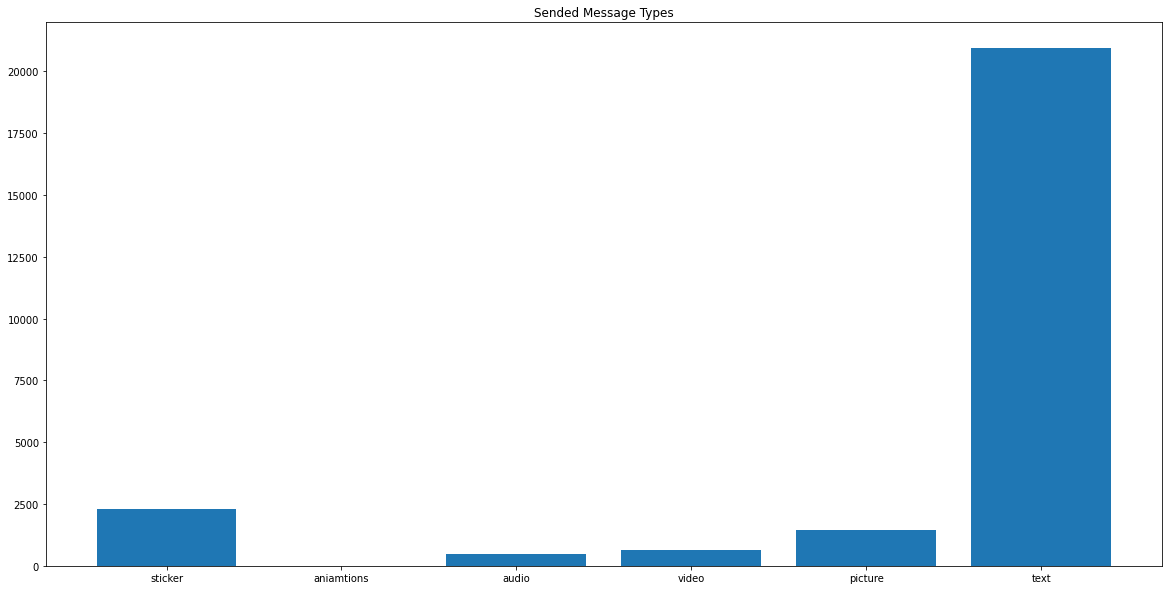

In [201]:
# Visualizations

# amount msg type visualization -> maybe donut chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.bar(["sticker", "aniamtions", "audio", "video", "picture", "text"], 
        [amount_sticker_msg, amount_animations_msg, amount_audio_msg, amount_video_msg, amount_picture_msg, amount_text_msg])
ax.set_title("Sended Message Types")
plt.savefig('./sended_message_types.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33524\3610816505.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date, rotation=45)


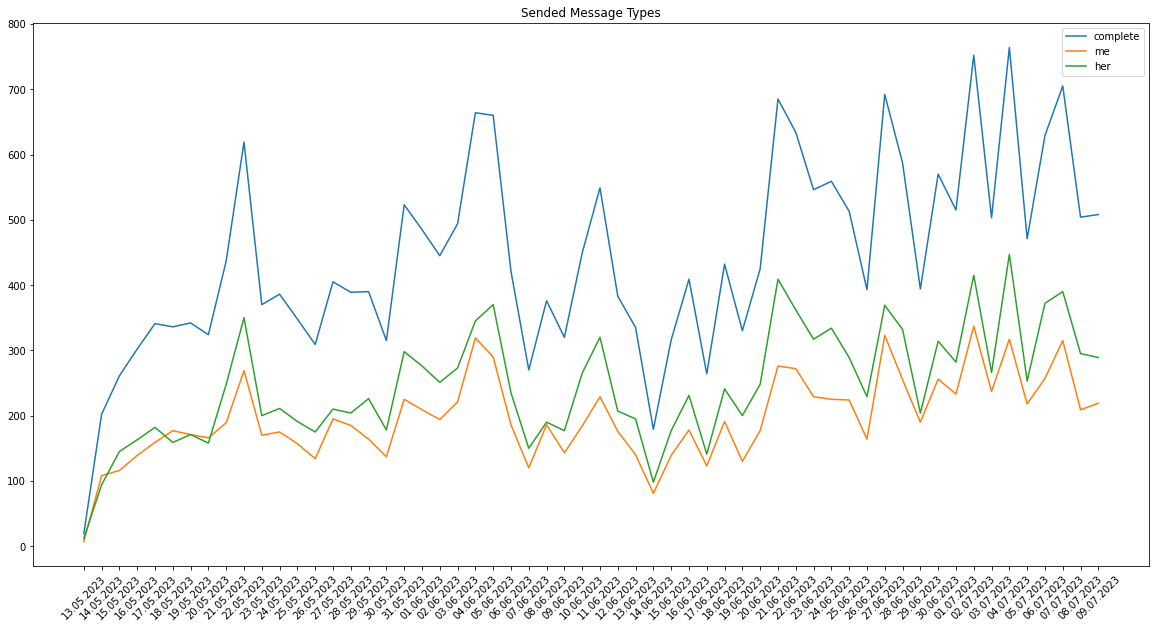

In [202]:
# Message sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(amount_msg_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(amount_msg_from_me_per_day)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(amount_msg_from_her_per_day)
ax.plot(date, data, label="her")
ax.set_title("Sended Message Types")
ax.set_xticklabels(date, rotation=45)
ax.legend()
plt.savefig('./sended_message_types_2.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33524\3756815974.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date, rotation=45)


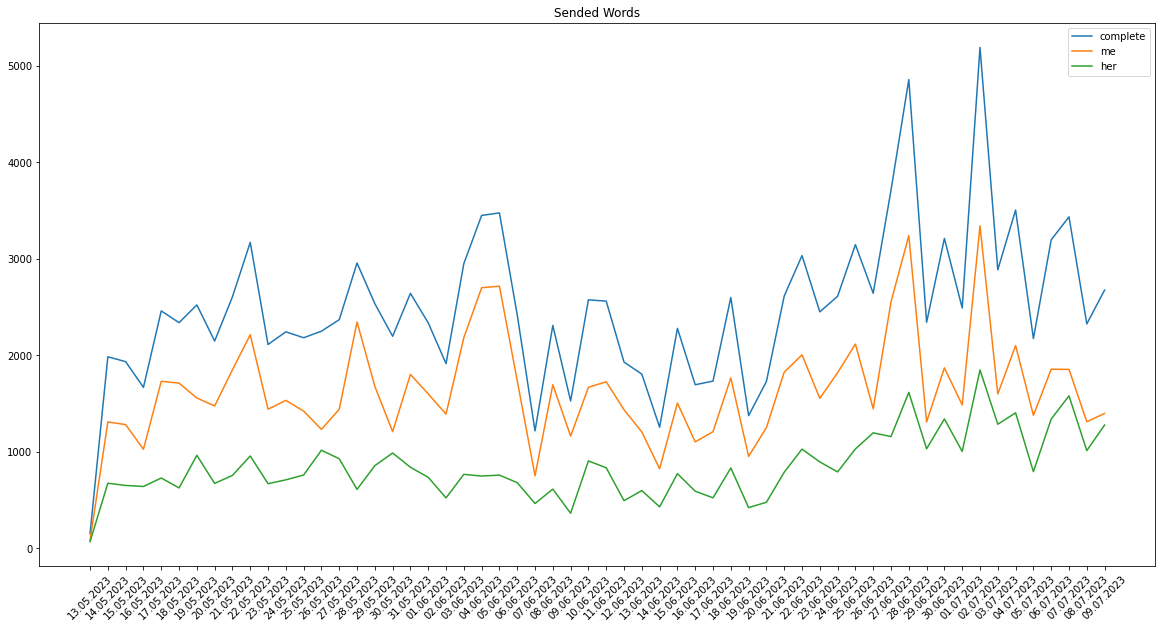

In [203]:
# Words sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(words_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(words_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(words_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Words")
ax.set_xticklabels(date, rotation=45)
ax.legend()
plt.savefig('./sended_words')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33524\2835246563.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date, rotation=45)


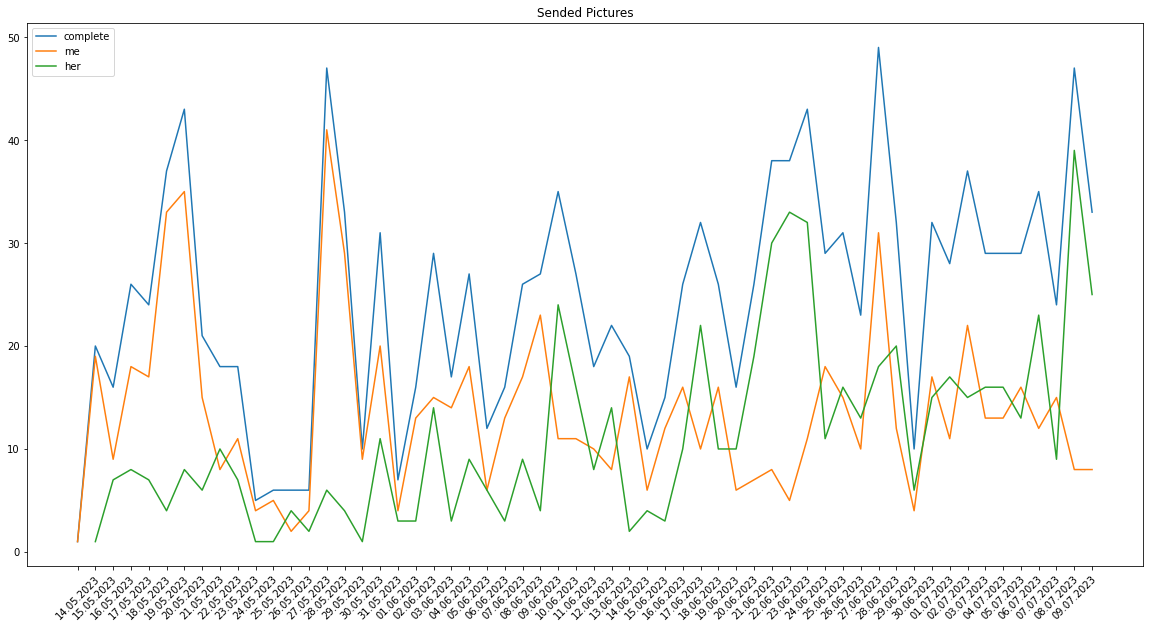

In [204]:
# Pictures sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(pictures_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(pictures_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(pictures_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Pictures")
ax.set_xticklabels(date, rotation=45)
ax.legend()
plt.savefig('./sended_pictures.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33524\1185030317.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date, rotation=45)


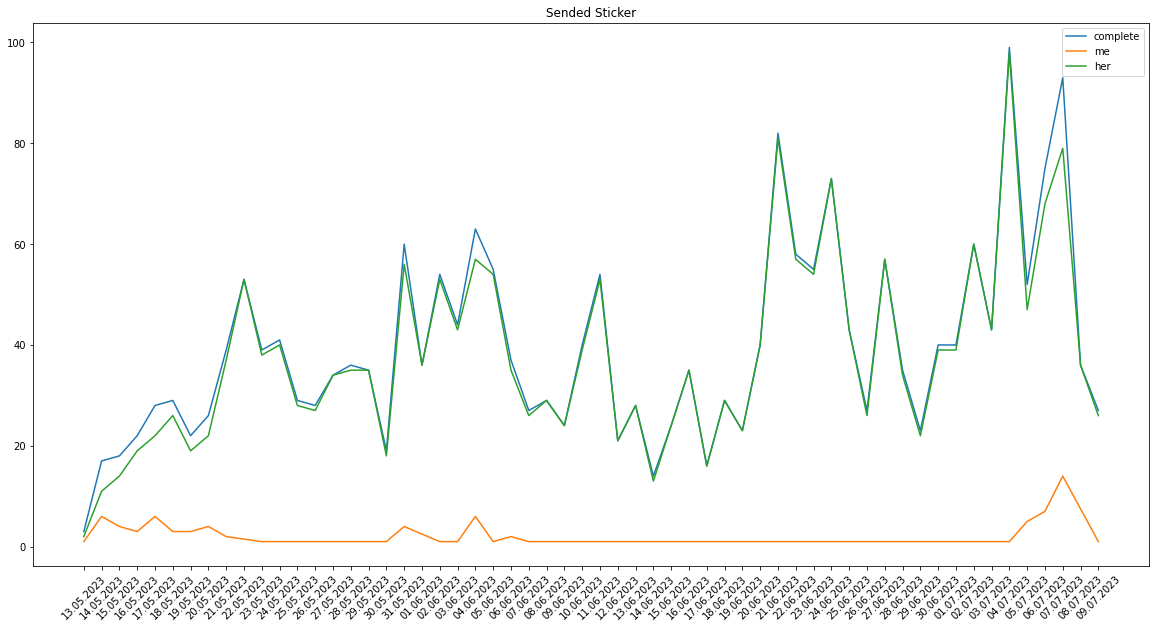

In [205]:
# Sticker sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(sticker_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(sticker_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(sticker_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Sticker")
ax.set_xticklabels(date, rotation=45)
ax.legend()
plt.savefig('./sended_sticker.png')

In [206]:
# Animation sended
if len(animations_per_day.values()) > 5:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
    date, data = convert_dict_as_date_sorted_list(animations_per_day)
    ax.plot(date, data, label="complete")
    date, data = convert_dict_as_date_sorted_list(animations_per_day_from_me)
    ax.plot(date, data, label="me")
    date, data = convert_dict_as_date_sorted_list(animations_per_day_from_her)
    ax.plot(date, data, label="her")
    ax.set_title("Sended Animations")
    ax.set_xticklabels(date, rotation=45)
    ax.legend()
    plt.savefig('./sended_animations.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33524\4292972198.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date, rotation=45)


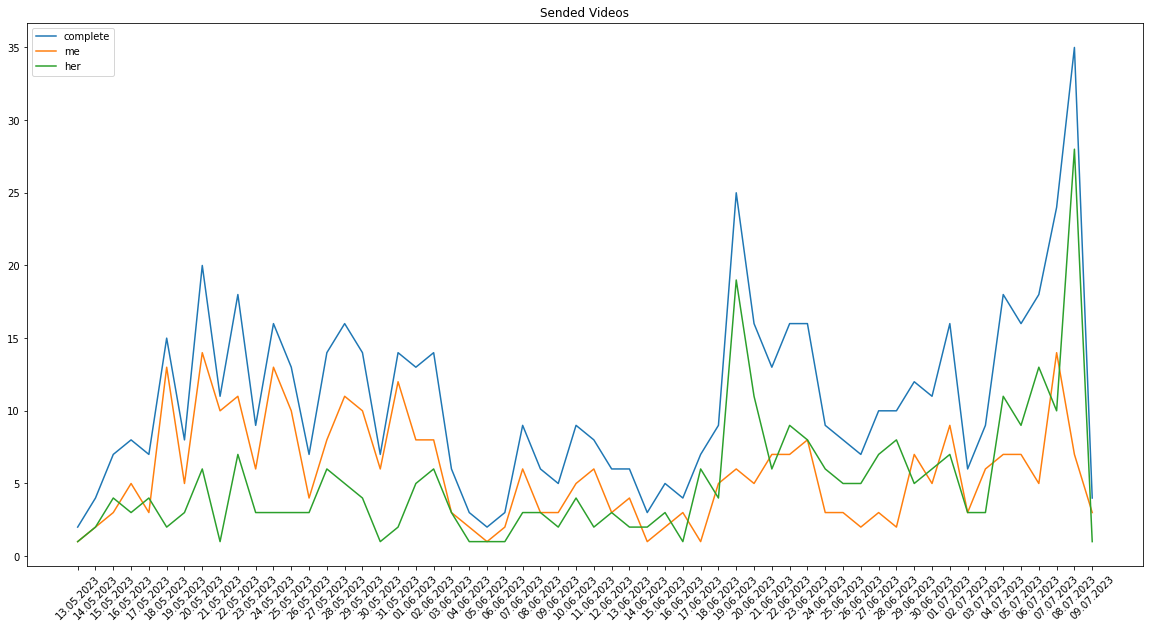

In [207]:
# Video sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(video_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(video_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(video_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Videos")
ax.set_xticklabels(date, rotation=45)
ax.legend()
plt.savefig('./sended_video.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33524\1019346365.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date, rotation=45)


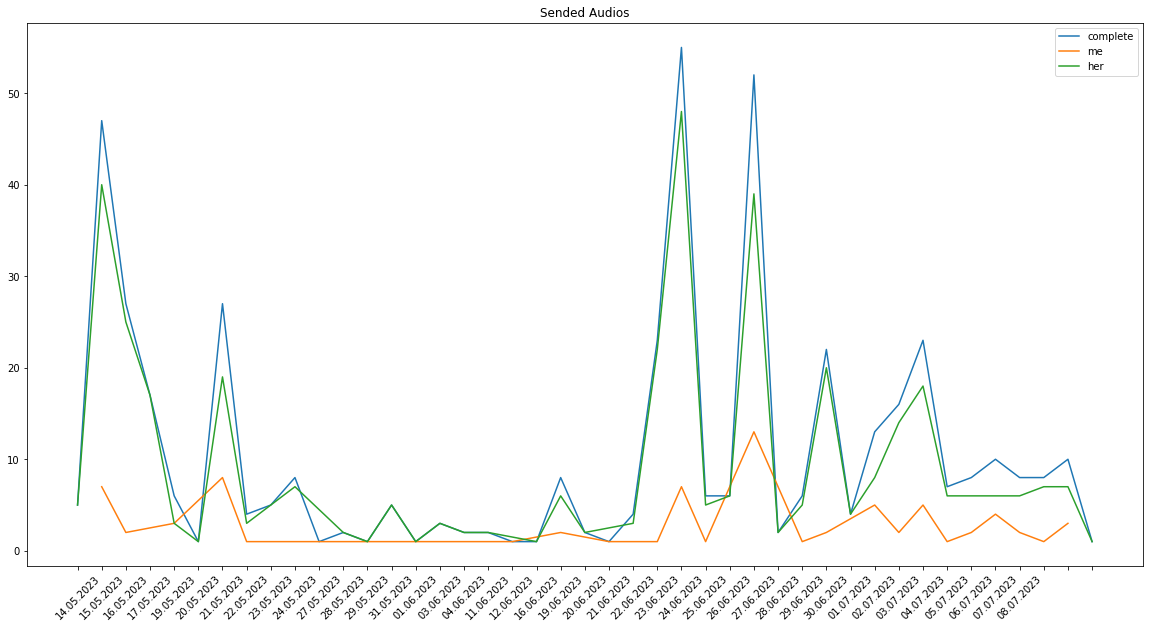

In [208]:
# Audio sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(audio_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(audio_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(audio_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Audios")
ax.set_xticklabels(date, rotation=45)
ax.legend()
plt.savefig('./sended_audio.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33524\3575106736.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date, rotation=45)


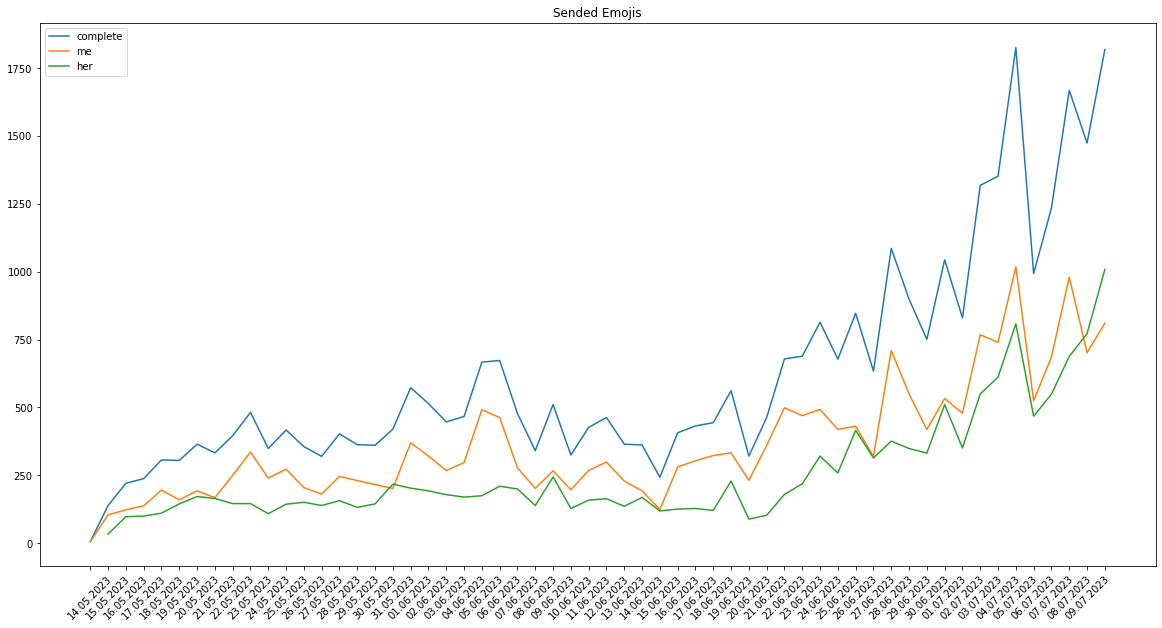

In [209]:
# Emoji sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(emoji_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(emoji_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(emoji_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Emojis")
ax.set_xticklabels(date, rotation=45)
ax.legend()
plt.savefig('./sended_emojis.png')

wordclouds ☁️

In [210]:
segments_list = jieba.cut(text_complete)
segments_text = " ".join(segments_list)

to_replace = [letter for letter in list(string.ascii_lowercase + string.ascii_uppercase)]
segments_list = jieba.cut(replace_elems_in_str(text_complete, to_replace))
segments_text_only_ch = " ".join(segments_list)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\tobia\AppData\Local\Temp\jieba.cache
Loading model cost 0.659 seconds.
Prefix dict has been built successfully.


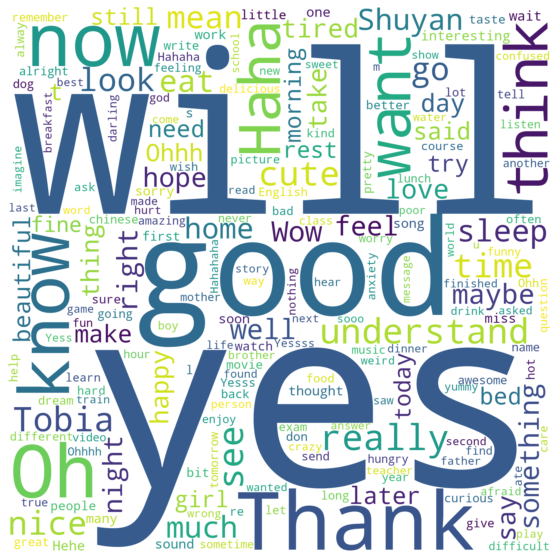

In [211]:
# Wordclouds
wordcloud = WordCloud(collocations=False, width=2000, height=2000, background_color="white").generate(text_complete)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.savefig('./wordcloud_1.png')

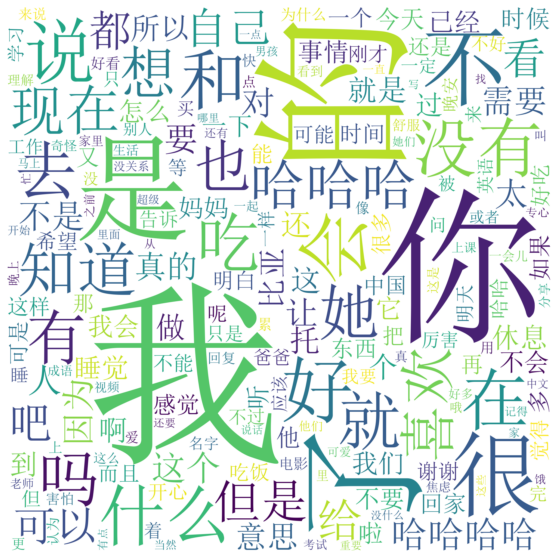

In [212]:
wordcloud = WordCloud(collocations=False, width=2000, height=2000, background_color="white", font_path="C:/Windows/Fonts/simsun.ttc").generate(segments_text_only_ch)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.savefig('./wordcloud_2.png')

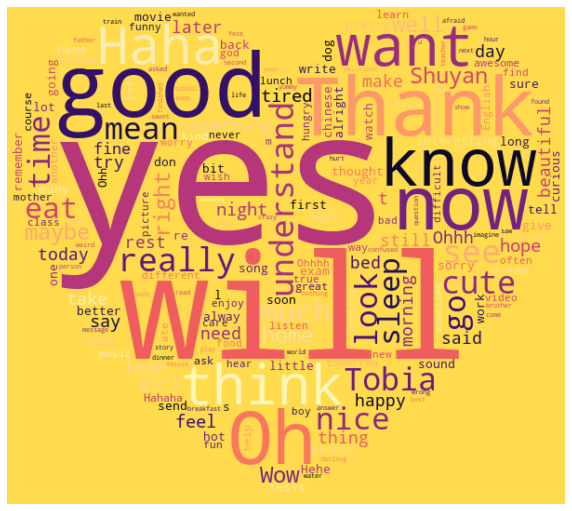

In [213]:
name = "love"
im_mask = np.array(PIL.Image.open(f"./res/{name}.png"))

wordcloud = WordCloud(width = 2000, height = 2000, mask=im_mask, colormap="magma",
                            background_color="#ffdb4d", collocations=False,
                            contour_color="#ffdb4d",contour_width=0.1).generate(text_complete)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('./wordcloud_3.png')

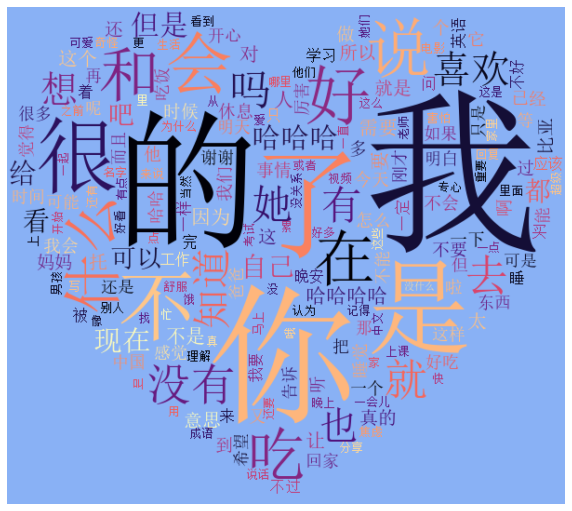

In [214]:
name = "love"
im_mask = np.array(PIL.Image.open(f"./res/{name}.png"))

wordcloud = WordCloud(width = 2000, height = 2000, mask=im_mask, colormap="magma",
                            background_color="#89b1f5", collocations=False,
                            contour_color="#89b1f5",contour_width=0.1, font_path="C:/Windows/Fonts/simsun.ttc").generate(segments_text_only_ch)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('./wordcloud_4.png')

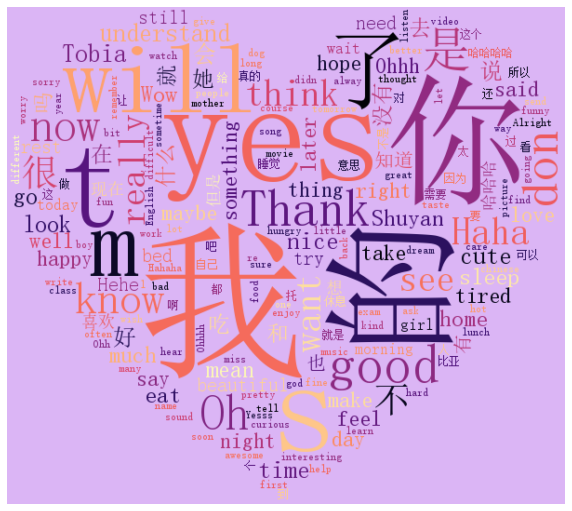

In [215]:


wordcloud = WordCloud(width = 2000, height = 2000, mask=im_mask, colormap="magma",
                            background_color="#dbb5f5", collocations=False,
                            contour_color='#dbb5f5',contour_width=0.1, font_path="C:/Windows/Fonts/simsun.ttc").generate(segments_text)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('./wordcloud_5.png')

---

<br>
For the most beautiful woman in this world ❤️<br>
In love, Tobia 😊🥰😘😘😘

---

### Code Statistics

In [216]:
import nbformat
import ast

def count_code_lines_defs_vars(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = nbformat.read(f, nbformat.NO_CONVERT)

    code_lines = 0
    defs_count = 0
    vars_count = 0

    for cell in notebook.cells:
        if cell.cell_type == 'code':
            code_lines += len(cell['source'].split('\n'))
            defs_count += cell['source'].count('def')
            parsed_ast = ast.parse(cell['source'])
            vars_count += sum(isinstance(node, ast.Name) and isinstance(node.ctx, ast.Store) for node in ast.walk(parsed_ast))

    return code_lines, defs_count, vars_count

# Provide the path to your .ipynb file
notebook_path = './chat_analysis.ipynb'

code_lines, defs_count, vars_count = count_code_lines_defs_vars(notebook_path)
print(f"Number of code lines: {code_lines}")
print(f"Number of function definitions: {defs_count}")
print(f"Number of variables: {vars_count}")

Number of code lines: 989
Number of function definitions: 36
Number of variables: 488


---

### HTML & PDF Export

In [217]:
class website():

    def __init__(self, name=f"Tobia_x_Shuyan_Chatanalysis_{FROM_DATE}-{DATE}"):
        self.style = "\
<style>\n\
    body {\n\
        font-family: Consolas, monospace;\n\
        }\n\
    h1 {\n\
        font-size: 36px;\n\
        text-align: center;\n\
    }\n\
    h2 {\n\
        font-size: 18px;\n\
        text-align: center;\n\
    }\n\
    h3 {\n\
        font-size: 16px;\n\
        text-align: center;\n\
        font-weight: normal;\n\
    }\n\
    p {\n\
        margin-left: 30px;\n\
    }\n\
    .img-container {\n\
        text-align: center;\n\
        display: block;\n\
      }\n\
</style>"
        self.header = f"\
<!doctype html>\n\
<html>\n\
<head>\n\
    <title>{name}</title>\n\
    <meta charset='utf-8'>\n\
    <meta http-equiv='Content-type' content='text/html; charset=utf-8'>\n\
    <meta name='viewport' content='width=device-width, initial-scale=1'>\
    {self.style}\
\n</head>"

        self.body = "<body>\n"
        self.tail = "</body>\n</html>"
        self.orientation = "left"
        self.name = name

    def add(self, content:str):
        self.body += f"\n{content}"

    def add_text(self, content:str, orientation="left", type="p", bold=False):
        style = f"text-align:{orientation}"
        if bold == False:
            style += f";font-weight:normal;'"
        self.body += f"\n        <{type} style='{style}'>{content}</{type}>"

    def add_space(self, space_in_px=10, vertical_spacing=True):
        if vertical_spacing:
            self.body += f"\n        <p style='margin-top:{space_in_px}px'></p>"
        else:
            self.body += f"\n        <p style='margin-left:{space_in_px}px'></p>"

    def add_image(self, img_path:str, width=100, orientation="left", float_left=False):
        img_path = f"file://{os.path.abspath(img_path)}"
        style = f"text-align:{orientation}"
        if float_left:
            style += ";float:left;"
        self.body += f"\n        <div style='{style}'><img src=\"{img_path}\" width='{width}%' style='text-align:{orientation}'><img/></div>"

    def add_list(self, content:str, orientation="left"):
        self.body += self.create_list(content)

    def create_list(self, content:list) -> str:
        cache = "\n        <ul>"
        for elem in content:
            if type(elem) == list:
                cache += "\n        <li><ul>"
                for elem_elem in elem:
                    cache += f"<li>{elem_elem}</li>"
                cache += "</ul></li>"
            else:
                cache += f"\n        <li>{elem}</li>"
        cache += "\n        </ul>"
        return cache

    def get_html_code(self) -> str:
        return f"{self.header}\n\n{self.body}\n\n{self.tail}"

    def save_html_code(self, path:str, set_auto_name=True):
        html_code = self.get_html_code()
        if set_auto_name:
            path = f"{path}/{self.name}.html"
        
        with open(path, "w", encoding="utf-8") as f:
            f.write(html_code)

        return path


    def create_pdf(self, path:str):
        pass

In [218]:
# create HTML
html = website()

SPACE_BETWEEN = 50
WIDTH = 50

html.add_text("Chat Analysis", orientation="center", type="h1", bold=True)
html.add_text("🔥Tobia x Shuyan🔥", orientation="center", type="h2", bold=True)
html.add_text(f"Between {FROM_DATE_NOT_AMERICAN} - {DATE_NOT_AMERICAN}", orientation="center", type="h3")

html.add_text(f"Dear 淑妍,<br>I hope you doing great darling.<br>You know I love data and my work is data.<br>\
So I decided to use my skills to analyze our chat.<br>I hope you find it interesting. I had much fun doing that!<br>\
I needed {code_lines} code lines, defined {defs_count} functions and used a total of {vars_count} variables.")
html.add_text(">>> Chat-Analysis Results: Tobia and Shuyan <<<<br><br>(me=Tobia=托比亚, her=Shuyan=书言)")

text_cache = f"Amount of messages: {amount_msg}<br>"
text_cache += f"&emsp;from me: {amount_msg_from_me}<br>"
text_cache += f"&emsp;from her: {amount_msg_from_her}<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of text messages:{amount_text_msg}<br>"
text_cache += f"Average amount of text messages per day:{calc_mean(text_msg_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(text_msg_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(text_msg_per_day_from_her)}<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of words:{amount_words}<br>"
text_cache += f"Average amount of text messages per day:{calc_mean(words_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(words_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(words_per_day_from_her)}<br>"
text_cache += f"Top used words:<br>"
top_used = get_elem_with_top_amount(words, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of pictures:{amount_picture_msg}<br>"
text_cache += f"Average amount of picture messages per day:{calc_mean(pictures_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(pictures_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(pictures_per_day_from_her)}<br>"
# text_cache += f"Top used pictures:<br>"
# top_used = get_elem_with_top_amount(pictures, amount=5)
# for i, x in enumerate(top_used):
#     key, value = x
#     text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of video:{amount_video_msg}<br>"
text_cache += f"Average amount of video messages per day:{calc_mean(video_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(video_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(video_per_day_from_her)}<br>"
# text_cache += f"Top used video:<br>"
# top_used = get_elem_with_top_amount(video, amount=5)
# for i, x in enumerate(top_used):
#     key, value = x
#     text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of emoji:{amount_emojis}<br>"
text_cache += f"Average amount of emoji messages per day:{calc_mean(emoji_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(emoji_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(emoji_per_day_from_her)}<br>"
text_cache += f"Top used emoji:<br>"
top_used = get_elem_with_top_amount(emoji, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of sticker:{amount_sticker_msg}<br>"
text_cache += f"Average amount of sticker messages per day:{calc_mean(sticker_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(sticker_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(sticker_per_day_from_her)}<br>"
# text_cache += f"Top used sticker:<br>"
# top_used = get_elem_with_top_amount(sticker, amount=5)
# for i, x in enumerate(top_used):
#     key, value = x
#     text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

# html.add_space()

# text_cache = f"Amount of animations:{amount_animations_msg}<br>"
# text_cache += f"Average amount of animations messages per day:{calc_mean(animations_per_day)}<br>"
# text_cache += f"&emsp;from me:{calc_mean(animations_per_day_from_me)}<br>"
# text_cache += f"&emsp;from her:{calc_mean(animations_per_day_from_her)}<br>"
# text_cache += f"Top used animations:<br>"
# top_used = get_elem_with_top_amount(animations, amount=5)
# for i, x in enumerate(top_used):
#     key, value = x
#     text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
# html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

html.add_text(f"{longest_streak_in_days} in a row daily written! From {longest_streak_first_date} to {longest_streak_last_date} 🔥")

html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)

html.add_image("./sended_message_types.png", width=WIDTH, orientation="center")
html.add_text("This shows which kind of messages we sent.", orientation="center")

html.add_space(space_in_px=SPACE_BETWEEN)

html.add_image("./sended_message_types_2.png", width=WIDTH, orientation="center")
html.add_image("./sended_words.png", width=WIDTH, orientation="center")
html.add_text("You send more and shorter messages. I send less but longer messages 😊", orientation="center")

html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)

html.add_image("./sended_pictures.png", width=WIDTH, orientation="center")
html.add_image("./sended_audio.png", width=WIDTH, orientation="center")
html.add_text("I love pictures, you love audios 🥰", orientation="center")

html.add_space(space_in_px=SPACE_BETWEEN)

html.add_image("./sended_sticker.png", width=WIDTH, orientation="center")
html.add_text("You love Stickers 😘", orientation="center")
html.add_image("./sended_emojis.png", width=WIDTH, orientation="center")
html.add_text("I’m more the oldschool emoji user 😊😂", orientation="center")

html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)

html.add_text("At least I created word clouds from all our sent messages:")
html.add_image("./wordcloud_1.png", float_left=True, width=100, orientation="center")
html.add_image("./wordcloud_2.png", float_left=True, width=100, orientation="center")
html.add_image("./wordcloud_3.png", float_left=True, width=100, orientation="center")
html.add_image("./wordcloud_4.png", float_left=True, width=100, orientation="center")
html.add_image("./wordcloud_5.png", float_left=True, width=100, orientation="center")

In [219]:
print(html.get_html_code())

<!doctype html>
<html>
<head>
    <title>Tobia_x_Shuyan_Chatanalysis_2023-05-13-2023-07-09</title>
    <meta charset='utf-8'>
    <meta http-equiv='Content-type' content='text/html; charset=utf-8'>
    <meta name='viewport' content='width=device-width, initial-scale=1'>    <style>
    body {
        font-family: Consolas, monospace;
        }
    h1 {
        font-size: 36px;
        text-align: center;
    }
    h2 {
        font-size: 18px;
        text-align: center;
    }
    h3 {
        font-size: 16px;
        text-align: center;
        font-weight: normal;
    }
    p {
        margin-left: 30px;
    }
    .img-container {
        text-align: center;
        display: block;
      }
</style>
</head>

<body>

        <h1 style='text-align:center'>Chat Analysis</h1>
        <h2 style='text-align:center'>🔥Tobia x Shuyan🔥</h2>
        <h3 style='text-align:center;font-weight:normal;''>Between 13.05.2023 - 09.07.2023</h3>
        <p style='text-align:left;font-weight:normal;''>Dear 

In [220]:
PDF_PATH = f"{GROUND_PATH}/{FROM_DATE_NOT_AMERICAN}_Chatanalysis_Tobia_x_Shuyan_Export.pdf"
PDF_PATH = f"./export/{FROM_DATE_NOT_AMERICAN}_Chatanalysis_Tobia_x_Shuyan_Export.pdf"
HTML_PATH = f"{GROUND_PATH}"
HTML_PATH = f"./export/"
wkhtmltopdf_PATH = "D:/Programme (real)/wkhtmltopdf/bin/wkhtmltopdf.exe"

COMPLETE_HTML_PATH = html.save_html_code(HTML_PATH)

config = pdfkit.configuration(wkhtmltopdf=wkhtmltopdf_PATH)
#pdfkit.from_string(html.get_html_code(), output_path=PDF_PATH, configuration=config)
pdfkit.from_file(COMPLETE_HTML_PATH, output_path=PDF_PATH, configuration=config, options={"encoding":"utf-8", "enable-local-file-access":True})
# there is als pdfkit.from_url ^^

OSError: wkhtmltopdf exited with non-zero code 1. error:
QPainter::begin(): Returned false
Exit with code 1, due to unknown error.


---